In [406]:
import numpy as np
from ultralytics import YOLO
import cv2
import easyocr
import matplotlib.pyplot as plt

In [455]:
img_path = "test_images/test19.jpg"

In [456]:
model = YOLO("best.pt")

In [457]:
detections = model(img_path)[0]


image 1/1 e:\My Projects\Number Plate detection\test_images\test19.jpg: 384x640 1 Back Plate, 54.5ms
Speed: 0.0ms preprocess, 54.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


In [458]:
detections_ = []
for detection in detections.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = detection
    detections_.append([x1, y1, x2, y2, score])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[547.4677734375, 281.88372802734375, 1145.9102783203125, 537.1064453125, 0.4531041085720062]
[([[104, 0], [503, 0], [503, 123], [104, 123]], '7506', 0.4483681917190552), ([[16, 114], [86, 114], [86, 146], [16, 146]], '1N0', 0.3060147902084618), ([[38, 96], [570, 96], [570, 253], [38, 253]], 'E2044', 0.2522576931628574)]


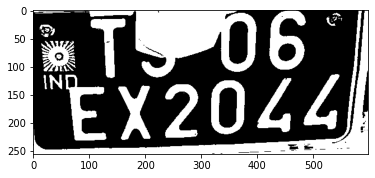

In [459]:

try:
    fls = detections_[0]
    print(fls)
    frame = cv2.imread(img_path)
    crop = frame[int(fls[1]):int(fls[3]), int(fls[0]):int(fls[2])]
    crop_gray=cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
    crop_gray =cv2.bitwise_not(crop_gray)
    ret, crop_gray_thresh = cv2.threshold(crop_gray, 127, 255, cv2.THRESH_BINARY)


    ksize = (1, 1)
  
# Using cv2.blur() method 
    image = cv2.blur(crop_gray_thresh, ksize) 


    reader = easyocr.Reader(['ch_sim','en'])
    plt.imshow(image, cmap="gray")
    result = reader.readtext(image)
    print(result)
except IndexError:
    print("Unable to Detect")


In [460]:
# result = reader.readtext(crop_gray)

In [461]:
mylist=list(result)
mylist

[([[104, 0], [503, 0], [503, 123], [104, 123]], '7506', 0.4483681917190552),
 ([[16, 114], [86, 114], [86, 146], [16, 146]], '1N0', 0.3060147902084618),
 ([[38, 96], [570, 96], [570, 253], [38, 253]], 'E2044', 0.2522576931628574)]

In [462]:
def contains_letters(s):
    return any(char.isalpha() for char in s)

def contains_numbers(s):
    return any(char.isdigit() for char in s)

In [463]:
numbers= []
for i in mylist:
    my_string = i[1]
    last_four_letters = my_string[-4:]
    if contains_numbers(last_four_letters):
        if contains_letters(last_four_letters):
            pass
        else:
            numbers.append(last_four_letters)   

In [464]:
numbers

['7506', '2044']

In [465]:
text_img = frame

cv2.rectangle(text_img, (int(fls[0]), int(fls[1])), (int(fls[2]), int(fls[3])),(255,0,0), 10)
res_img = cv2.putText(text_img, str(numbers[1]) , (int(fls[0]), int(fls[1])), cv2.FONT_HERSHEY_SIMPLEX, 3, (36,255,12), 5)


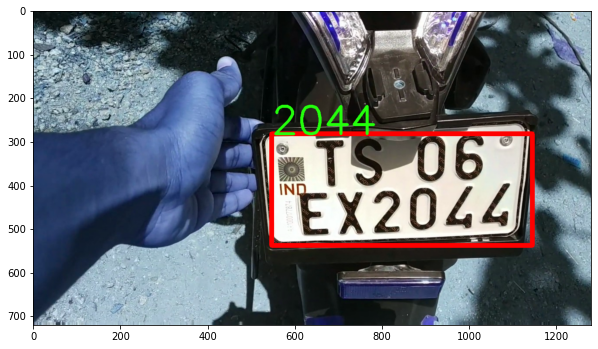

In [466]:
plt.figure(figsize=(10,8))
plt.imshow(res_img)